In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

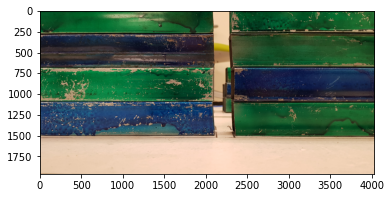

In [12]:
full = cv2.imread('../PhotosLARC/oneHalfHorizontal.png')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

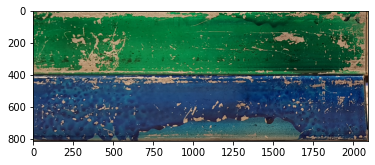

In [13]:
cut = cv2.imread('../PhotosLARC/cutOneHalfHorizontal.png')
cut = cv2.cvtColor(cut, cv2.COLOR_BGR2RGB)
plt.imshow(cut)

In [14]:
# All the 6 methods needed for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

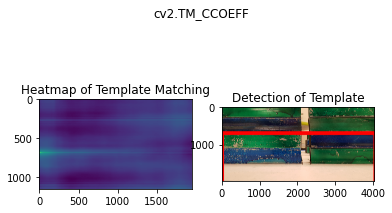

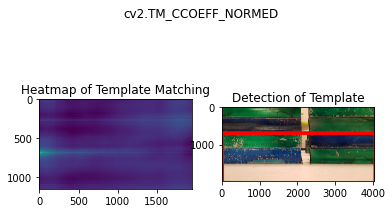

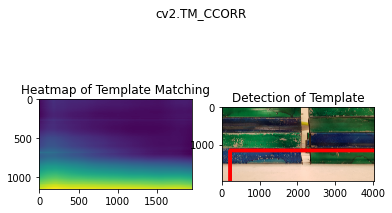

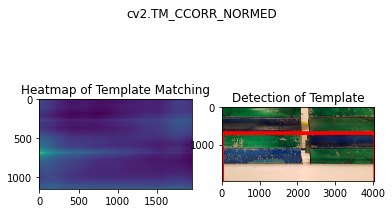

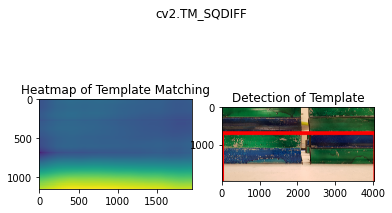

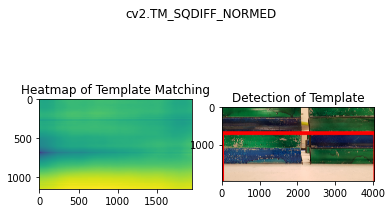

In [16]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)
#     Perform template matching
    res = cv2.matchTemplate(full_copy,cut,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
#         min_loc is a point (x,y)
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channels = full.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height) 
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),100)
#     Plot 1 row x 2 cols (the full and cut images,left and right)
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    
    plt.suptitle(m)
#     Avoid overriding of plots
    plt.show()
    
#     For spacing
    print('\n')
    print('\n')
    